In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualize Data

In [2]:
img = cv2.imread("data/face.jpg")

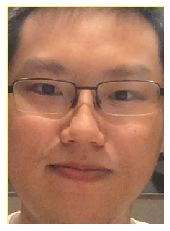

In [7]:
plt.imshow(img[..., ::-1])
plt.axis("off");

# Analyze Color Histogram

In [ ]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# y, cr, cb = cv2.split(img)

In [10]:
b, g, r = cv2.split(img)

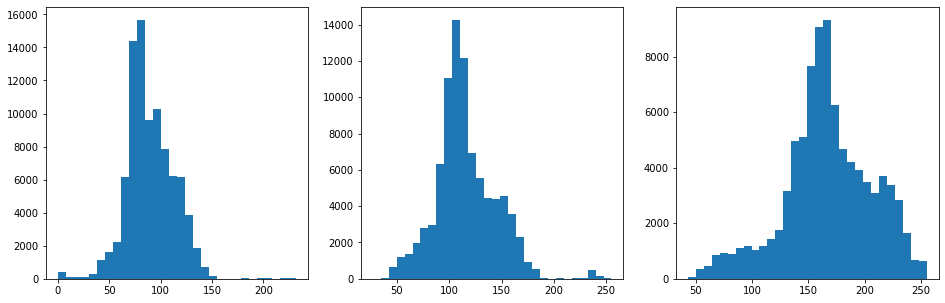

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16 , 5))
ax[0].hist(b.flatten(), bins=30)
ax[1].hist(g.flatten(), bins=30)
ax[2].hist(r.flatten(), bins=30);

# Calculate Skin Percent

In [15]:
min_val = np.array([60, 90, 145], dtype=np.uint8)
max_val = np.array([110, 150, 200], dtype=np.uint8)

In [23]:
skin = ((img >= min_val) & (img <= max_val)).all(2)
skin

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

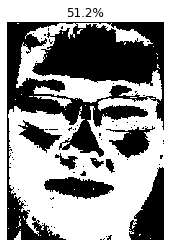

In [32]:
plt.imshow(skin, cmap="gray")
plt.title(f"{skin.mean()*100:.1f}%")
plt.axis("off");

In [36]:
def calculate_skin_percent(face, min_val=(60, 90, 145), max_val=(110, 150, 200)):
    b, g, r = cv2.split(face)
    
    min_val = np.array(min_val, dtype=np.uint8)
    max_val = np.array(max_val, dtype=np.uint8)
    
    skin = ((face >= min_val) & (face <= max_val)).all(2)
    skin_percent = skin.mean()
    return skin_percent

# Sanity Check

In [37]:
image = cv2.imread("data/face_mask_white.jpg")
calculate_skin_percent(image)

0.13861613671499604

In [38]:
image = cv2.imread("data/face_mask_dark.jpg")
calculate_skin_percent(image)

0.1335907335907336

In [39]:
image = cv2.imread("data/face.jpg")
calculate_skin_percent(image)

0.5115320697089472

In [40]:
image = cv2.imread("data/face_dark.jpg")
calculate_skin_percent(image)

0.11923608836481421

# Gagal pada kondisi berbeda? -> normalisasi

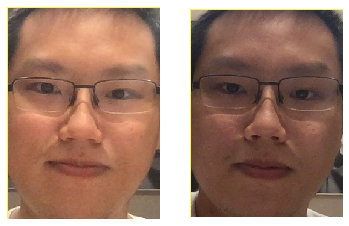

In [41]:
img1 = cv2.imread("data/face.jpg")
img2 = cv2.imread("data/face_dark.jpg")

plt.subplot(121)
plt.imshow(img1[..., ::-1])
plt.axis("off");

plt.subplot(122)
plt.imshow(img2[..., ::-1])
plt.axis("off");

In [52]:
def normalize_image(img):
    mean = img.reshape(-1, 3).mean(0).reshape(1, 1, -1)
    std = img.reshape(-1, 3).std(0).reshape(1, 1, -1)

    img = (img - mean) / std

    img = (np.clip(img, [-4, -4, -4], [4, 4, 4]) + 4) / 8
    img = (img * 255).astype(np.uint8)
    return img

In [53]:
img1 = normalize_image(img1)
img2 = normalize_image(img2)

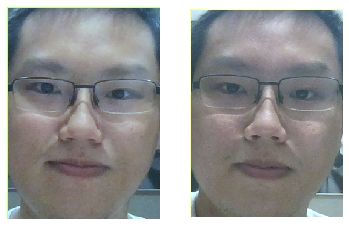

In [54]:
plt.subplot(121)
plt.imshow(img1[..., ::-1])
plt.axis("off");

plt.subplot(122)
plt.imshow(img2[..., ::-1])
plt.axis("off");

# Analisis ulang Color Histogram

In [55]:
b, g, r = cv2.split(img1)

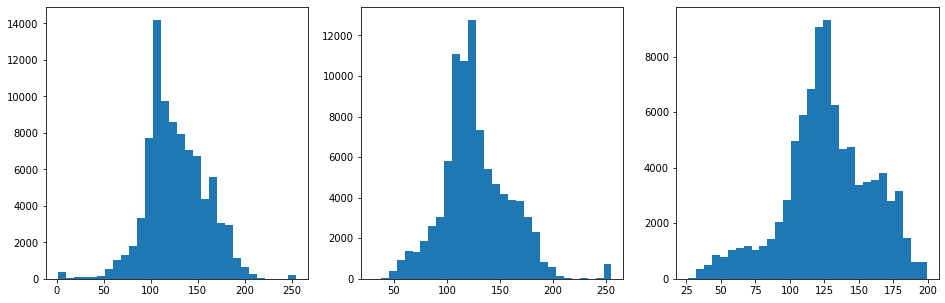

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(16 , 5))
ax[0].hist(b.flatten(), bins=30)
ax[1].hist(g.flatten(), bins=30)
ax[2].hist(r.flatten(), bins=30);

In [61]:
def calculate_skin_percent(face, min_val=(90, 100, 110), max_val=(150, 150, 150)):
    face = normalize_image(face)
    
    min_val = np.array(min_val, dtype=np.uint8)
    max_val = np.array(max_val, dtype=np.uint8)
    
    skin = ((face >= min_val) & (face <= max_val)).all(2)
    skin_percent = skin.mean()
    return skin_percent

# Sanity Check

In [62]:
image = cv2.imread("data/face_mask_white.jpg")
calculate_skin_percent(image)

0.41587974762879704

In [63]:
image = cv2.imread("data/face_mask_dark.jpg")
calculate_skin_percent(image)

0.23719600862458004

In [64]:
image = cv2.imread("data/face.jpg")
calculate_skin_percent(image)

0.46131647502694934

In [65]:
image = cv2.imread("data/face_dark.jpg")
calculate_skin_percent(image)

0.5097081195181424